In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the training data set
train_data = np.loadtxt('./.cleaned_data_train_Data.csv',delimiter=',',dtype=int)

In [3]:
classifier_freq = np.ones( 10, dtype=int )
pixel_freq = np.ones( (28*28,10), dtype=int )
N = train_data.shape[0]
D = train_data.shape[1]

In [4]:
#computing Nc and Nic
for i in range(N):
    c = train_data[i,0]
    classifier_freq[c] = classifier_freq[c] + 1
    for j in range(28 * 28):
        if train_data[i,1:][j] == 1:
            pixel_freq[j,c] = pixel_freq[j,c]+1

In [5]:
#computing posterior means
pi_hat = classifier_freq / N
theta_hat = np.zeros( (28 * 28,10), dtype=float)
for c in range(10):
    for i in range(28 * 28):
        theta_hat[i,c] = theta_hat[i,c] + pixel_freq[i,c] / classifier_freq[c]
pi_hat_log = np.log(pi_hat)
theta_hat_log = np.log(theta_hat)
one_minus_theta_hat_log = np.log(1-theta_hat)

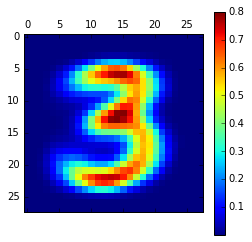

In [15]:
#heat map for theta hat
plt.matshow(theta_hat[:,3].reshape(28,28))
plt.colorbar()
plt.show()

In [7]:
#given a bit map, compute the posterior distrubution
def posterior(pixels):
    lp = np.zeros(10)
    for c in range(10):
        lp[c] = lp[c] + pi_hat_log[c]
        for j in range (28 * 28):
            if pixels[j] == 1:
                lp[c] = lp[c] + theta_hat_log[j,c]
            else:
                lp[c] = lp[c] + one_minus_theta_hat_log[j,c]
    return (np.exp(lp) / sum(np.exp(lp)))

In [8]:
#import the test set
test_data = np.loadtxt('./.cleaned_data_test_Data.csv',delimiter=',',dtype=int)

In [9]:
#compute argmax for the posterior distrubution and the corresponding probability
def best_guess(pixels):
    guess = np.argmax(posterior(pixels))
    prob = posterior(pixels)[guess]
    return (guess, prob)

In [10]:
def test_label_guess(row):
    test = test_data[row,1:]
    label = test_data[row,0]
    (guess,prob) = best_guess(test)
    return (label,guess,prob)

In [11]:
def print_row(row):
    plt.matshow(test_data[row,1:].reshape(28,28))
    plt.show()
    return

In [12]:
#accuracy of the NBC
counter = 0
for r in range(test_data.shape[0]):
    (label,guess,prop) = test_label_guess(r)
    if label == guess:
        counter = counter + 1
print(counter / test_data.shape[0])

0.8427


(9, 4, 0.99999999999738665)


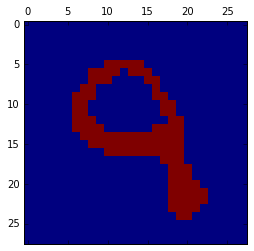

(4, 4, 0.99994308086274919)


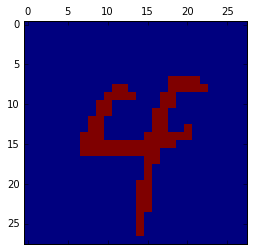

(3, 3, 0.98903184180526571)


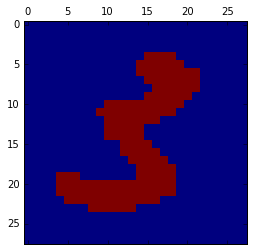

(6, 6, 1.0)


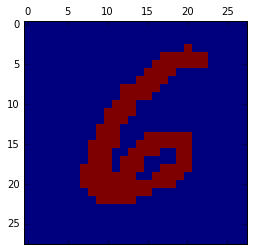

(3, 3, 0.99999995195760694)


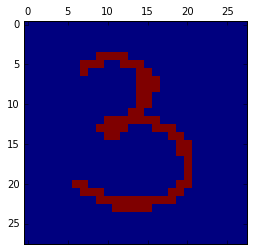

(1, 1, 1.0)


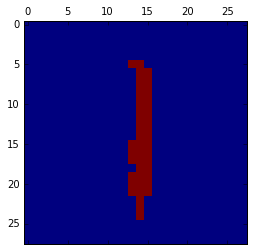

(1, 1, 1.0)


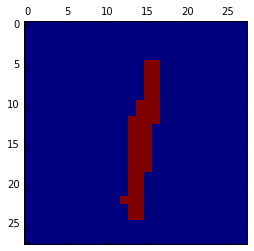

(7, 9, 0.9148721221337287)


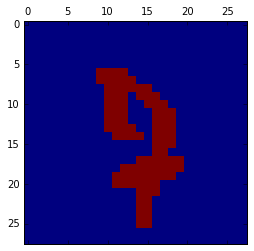

(6, 6, 1.0)


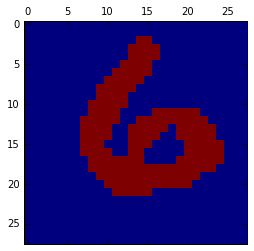

(9, 9, 0.99999999999929334)


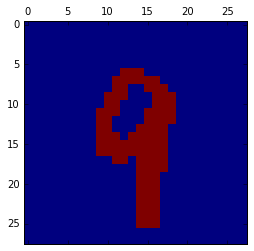

(1, 1, 1.0)


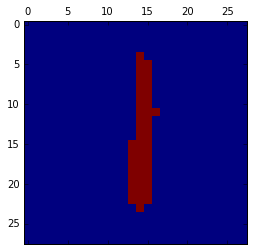

(8, 8, 0.99856557962196091)


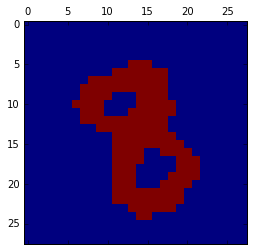

(4, 4, 0.99999999999999989)


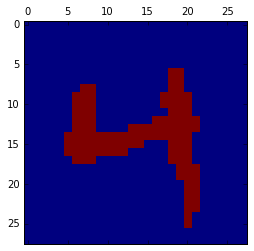

(1, 1, 0.78416587703380147)


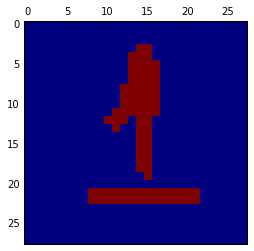

(1, 1, 1.0)


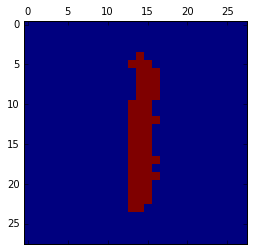

(9, 9, 0.94524500310106141)


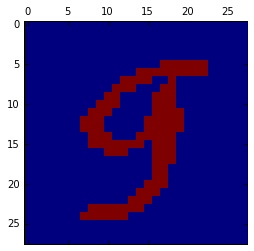

(9, 9, 0.98943111913190485)


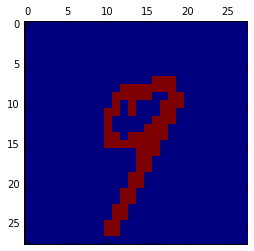

(4, 9, 0.99999999917438309)


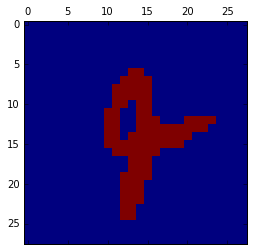

(3, 5, 0.97332585836503671)


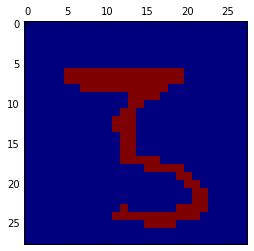

(6, 6, 1.0)


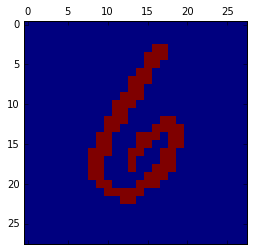

In [13]:
#examples
for x in range(4000,4020):
    print(test_label_guess(x))
    print_row(x)